# Python for Data Science, Level I
### *Session \#8*
---

### Helpful shortcuts
---

**SHIFT** + **ENTER** ----> Execute Cell

**TAB** ----> See autocomplete options

**ESC** then **b** ----> Create Cell 

**ESC** then **dd** ----> Delete Cell

**\[python expression\]?** ---> Explanation of that Python expression

**ESC** then **m** then __ENTER__ ----> Switch to Markdown mode

## I. APIs and JSON
---

### Warm Ups

**Imports:** 
```python
import requests
import pandas as pd
```

In [1]:
import requests
import pandas as pd

**GET Request:** 
```python
joke_url = "http://api.icndb.com/jokes/random"
requests.get(joke_url).json()
```

In [5]:
joke_url = "http://api.icndb.com/jokes/random"
data = requests.get(joke_url).json()

data['value']['joke']

"If you Google search &quot;Chuck Norris getting his ass kicked&quot; you will generate zero results. It just doesn't happen."

**GET Request with query string parameters**: 
```python
params = {"firstName": "Rob", "lastName": "Carrington"}
requests.get(joke_url, params=params).json()
```

**Fetching nested data:**
```python
data_dict = requests.get(joke_url).json()
data_dict['value']['joke']
```

## Exercises
---
**1. Do a basic GET request to the Kanye West quote API below, and fetch the quote from the response**

In [110]:
kanye_api = "https://api.kanye.rest"

**2. Call the Quote of the Day API below, with the parameter** `category` **set to either** `inspire`, `funny` **or** `sports`. **Fetch the author and the quote itself.**

In [ ]:
quote_api = "http://quotes.rest/qod.json"

**3. Call the stock market API below, with the following parameters:**
```
function: TIME_SERIES_DAILY
symbol: MSFT
apikey: 88WLCWEX74ZWRAOX
```

In [104]:
stock_api = "https://www.alphavantage.co/query"
params = {"function": "TIME_SERIES_DAILY", "symbol": "MSFT", "apikey": "88WLCWEX74ZWRAOX"}
data = requests.get(stock_api, params).json()
inner_data = data['Time Series (Daily)']

**4. Fetch the daily stock data from the stock market API response. Follow the example below to convert this to a dataframe, and save it as** `stock_df`
```python
pd.DataFrame.from_dict(data, orient='index', dtype="float")
```

In [59]:
df = pd.DataFrame.from_dict(inner_data, orient='index', dtype="float")

### Extra Credit
---
**1. In addition to query string parameters, APIs can also vary their response by having different** "routes."
**Explore the Star Wars API below by adding routes like** `/people/1`, `/planets/4`, **or** `starships/9` **to the end.**

In [133]:
star_wars_api = "https://swapi.co/api/"

## II. Timeseries Data
---

### Warm Ups

**Converting an index to datetime:** `stock_df.index = pd.to_datetime(stock_df.index)`

In [20]:
df.index = pd.to_datetime(df.index)

**Grab year/month/day of data with partial string index:** 
```python
stock_df.loc['2017']
stock_df.loc['2017-02']
stock_df.loc['2017-02-01']
```

In [24]:
df.loc['2019-01-15']

1. open           102.51
2. high           105.05
3. low            101.88
4. close          105.01
5. volume    31587616.00
Name: 2019-01-15 00:00:00, dtype: float64

**Grab slice with partial string index:** `stock_df['2019-01':'2019-03']`

In [27]:
q1 = df['2019-01':'2019-03']

**See summary statistics:** `stock_df.describe()`

**Create a basic plot of two column:** `stock_df[['1. open', '4. close']].plot()`

In [198]:
# Turns on inline graphing
%matplotlib inline

# Add your code here

### Exercises
---
**1. Create a dataframe** `q1` **with just the stock data from January to April 2019**

In [32]:
q1 = df['2019-01':'2019-04']

1. open      float64
2. high      float64
3. low       float64
4. close     float64
5. volume    float64
dtype: object

**2. Create a line plot of the closing price during Q1**

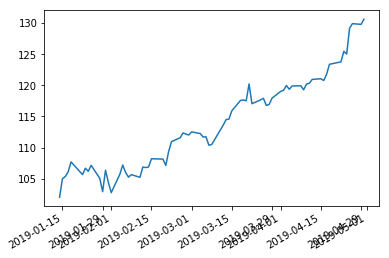

In [30]:
%matplotlib inline
q1['4. close'].plot()

**3. What was the averaging closing price of MSFT during Q1? How does that compare to its average price in 2018?**

In [33]:
q1['4. close'].mean()

113.75662162162165

**4. What was the best day in 2019 to buy MSFT? What was the best day to sell?**

Hint: You can use the Numpy function `.idxmin()` to find the index of the min argument, and likewise for `.idxmax()`

In [ ]:
df.loc['2019']['3. low'].idxmin()
df.loc['2019']['2. high'].idxmax()

### Extra Credit
---

**1. We can also read timeseries data in from CSVs and Excel files. Below is an example of reading.**

```python
df = pd.read_csv("path_to_file", parse_dates=['Date'], index_col='Date')
```

**Read in the file** `stocks.csv` **following this example, and create a line plot from the data inside**

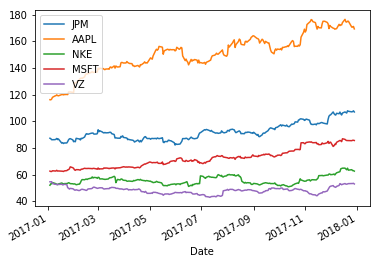

In [52]:
df = pd.read_csv("stocks.csv", parse_dates=['Date'], index_col="Date")
df[['JPM', 'AAPL', 'NKE', 'MSFT', 'VZ']].plot()

## I. Intro to Matplotlib

### Warm Ups

---

**Import pandas and matplotlib:**
```python
import pandas as pd
import matplotlib.pyplot as plt
```

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

**Set base style:** `plt.style.use('seaborn')`

*Note: This page lists [all base styles](https://matplotlib.org/gallery/style_sheets/style_sheets_reference.html) supported by Matplotlib.* 

In [66]:
plt.style.use('seaborn')

**Create bar chart and save figure:**

```python
rigged_axes = rigged_df.plot(kind='bar', x="languages")
rigged_fig = plt.gcf()
```

*Note: `gfc()` is short for "get current figure"*

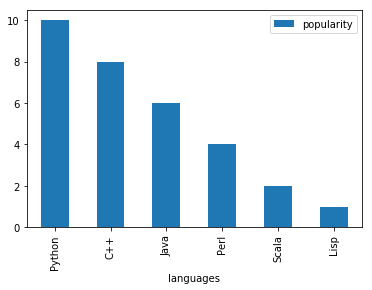

In [55]:
languages = ['Python', 'C++', 'Java', 'Perl', 'Scala', 'Lisp']
popularity = [10, 8, 6, 4, 2, 1]
rigged_df = pd.DataFrame({"languages": languages, "popularity": popularity}, index=languages)

# Add your code here

rigged_axes = rigged_df.plot(kind='bar', x="languages")
rigged_fig = plt.gcf()

**Set figure size:** `rigged_fig.set_size_inches(10, 6)`

**Set title of plot:**  `rigged_axes.set_title("Awesome title")`

*Note: Can optionally also set* `fontsize` *and* `fontname`. *This page lists [all the fonts](http://jonathansoma.com/lede/data-studio/matplotlib/list-all-fonts-available-in-matplotlib-plus-samples/) supported by Matplotlib*

**Set axis label:** `rigged_axes.set_xlabel("Taxonomy")`

*Note: Can optionally also set* `fontsize` *and* `fontname`

### Exercises
---

**1. Create a dataframe from the file** `animal_lifespans.csv`

In [61]:
animal_df = pd.read_csv("animal_lifespans.csv", encoding='latin-1')

**2. Create a smaller dataframe with just the columns** `TaxonClass`, `Male MLE`, `Female MLE`, **and** `Overall MLE`. **Drop rows with any nulls using** `.dropna()` **dataframe method.**

In [63]:
cols = ["TaxonClass", "Male MLE", "Female MLE", "Overall MLE"]

small_df = animal_df[cols].dropna()

**3. Group on the column** `TaxonClass` **and take the mean. Plot the result as a bar chart, and save it as** `animal_axes`. **Save the figure as** `animal_fig`

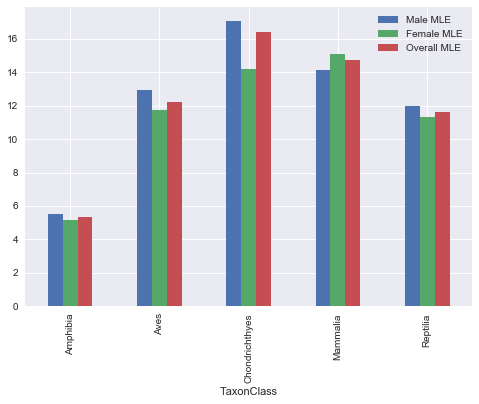

In [67]:
averaged = small_df.groupby("TaxonClass").mean()

animal_axes = averaged.plot(kind='bar')
animal_fig = plt.gcf()

**4. Give the bar chart a title and resize it to 12" x 6". Label the x-axis as** `Class` **and the y-axis as** `Life Expectancy in Years`

In [71]:
animal_axes.set_title("Awesome title", fontsize=34)
animal_axes.set_xlabel("Class")
animal_axes.set_ylabel("Life Expectancy in Years")


animal_fig.set_size_inches(12, 6)
animal_fig.savefig("CoolGraph.pdf")

### Extra Credit
---
**1. Bokeh is a more recent plotting library, which can output interactive HTML plots.**

**The code that follows generates a candlestick plot of our MSFT data -- see if you can modify the code to change the color of the candlesticks and other features of the graph.**

In [60]:
from bokeh.plotting import figure, show, output_file

df 

# Boolean mask to select days of increasing vs. decreasing
inc = df['4. close'] > df['1. open']
dec = df['1. open'] > df['4. close']

# A day, in milliseconds
day = 24*60*60*1000

# Create the 
p = figure(x_axis_type="datetime", plot_width=1000, title = "MSFT Candlestick")
p.segment(df.index, df['2. high'], df.index, df['3. low'])


# Draws the candlestick
p.vbar(df.index[inc], day, df['1. open'][inc], df['4. close'][inc], fill_color="#D5E1DD", line_color="black")
p.vbar(df.index[dec], day, df['1. open'][dec], df['4. close'][dec], fill_color="#F2583E", line_color="black")


output_file("candlestick.html", title="Candlestick Plot")
show(p)

## BONUS FUNCTION

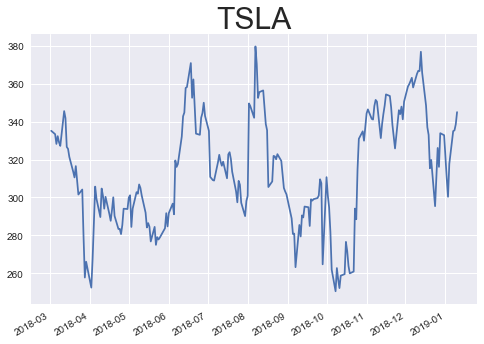

In [103]:
def gen_graph(symbol, start, end):
    stock_api = "https://www.alphavantage.co/query"
    params = {"function": "TIME_SERIES_DAILY", 
              "symbol": symbol, 
              "outputsize": "full",
              "apikey": "88WLCWEX74ZWRAOX"}
    data = requests.get(stock_api, params).json()
    inner_data = data['Time Series (Daily)']
    df = pd.DataFrame.from_dict(inner_data, orient='index', dtype="float")
    df.index = pd.to_datetime(df.index)
    sliced_df = df.loc[start:end]
    axes = sliced_df['4. close'].plot()
    axes.set_title(symbol, fontsize=30)
    return axes

gen_graph("TSLA", "2018-03-02", "2019-01-10")